In [235]:
import scipy.io as sio
import os
import numpy as np

task1=sio.loadmat('./BCICIV_2a_gdf/BCIfirsttask1.mat')
task2=sio.loadmat('./BCICIV_2a_gdf/BCIfirsttask2.mat')
task3=sio.loadmat('./BCICIV_2a_gdf/BCIfirsttask3.mat')
task4=sio.loadmat('./BCICIV_2a_gdf/BCIfirsttask4.mat')

label=['']
label1=['']
label2=['']
label3=['']
for i in task1:
    if i.find('C')!=-1:
     label.append(i)
del label[0]
for j in task2:
  if j.find('C')!=-1:
      label1.append(j)
del label1[0]
label1.append(label1[0])
del label1[0]
for k in task3:
 if k.find('C')!=-1:
     label2.append(k)
del label2[0]
for l in task4:
 if l.find('C')!=-1:
     label3.append(l)
del label3[0]
label.append(label[0])
del label[0]
print(label)
print(label1)
print(label2)
print(label3)

['C3sessiontask1', 'C4sessiontask1', 'Czsessiontask1']
['C3sessiontask2', 'C4sessiontask2', 'Czsessiontask2']
['C3sessiontask3', 'C4sessiontask3', 'Czsessiontask3']
['C3sessiontask4', 'C4sessiontask4', 'Czsessiontask4']


In [236]:
from scipy import signal
import seaborn as sns
import math
import pywt
import matplotlib.pyplot as plt
def psde2(j,k,q):
    mode = pywt.Modes.smooth
    wav = pywt.Wavelet('db4')
    # Define window length (4 seconds)
    f_s = 250
    win = 2*f_s
   # plt.figure(figsize=(8, 4))
    wp1 = pywt.WaveletPacket(j[750:1499], wav, mode)
    ys1=wp1['aa'].data
    wp2 = pywt.WaveletPacket(k[750:1499], wav, mode)
    ys2=wp2['aa'].data
    wp3 = pywt.WaveletPacket(q[750:1499], wav, mode)
    ys3=wp3['aa'].data 
    plt.figure(figsize=(8, 4))
    #plt.xlim([0, 40]) 
    freqs,pst = signal.periodogram(ys1, f_s,  'flattop', scaling='density')
    freqs1,pst1 = signal.periodogram(ys2, f_s, 'flattop', scaling='density')
    freqs2,pst2 = signal.periodogram(ys3, f_s,  'flattop', scaling='density')
    plt.plot(freqs[0:40], pst[0:40],freqs1[0:40], pst1[0:40],freqs2[0:40], pst2[0:40],lw=2)
    labels = ['C3','C4','Cz'] 
    plt.legend(labels, loc=1)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power spectral density (V^2 / Hz)')
    print(len(freqs[3:15]))
    h=0
    i=0
    sums=float(0.0)
    sum1=float(0.0)
    sum2=float(0.0)
    pste=np.empty(582)
    psdr=np.empty(97)
    pse=np.empty(97)
    psdr1=np.empty(97)
    pse1=np.empty(97)
    psdr2=np.empty(97)
    pse2=np.empty(97)
    while h<len(pst):
      sums=sums+abs(pst[h])
      sum1=sum1+abs(pst1[h])
      sum2=sum2+abs(pst2[h])
      pste[h]=pst[h]
      pste[h+194]=pst1[h]
      pste[h+388]=pst2[h]
      h=h+1
    while i<len(pst):
      psdr[i]=abs(pst[i])/sums
      pse[i]=psdr[i]*np.log(psdr[i])
      psdr1[i]=abs(pst1[i])/sum1
      pse1[i]=psdr1[i]*np.log(psdr1[i])
      psdr2[i]=abs(pst2[i])/sum2
      pse2[i]=psdr2[i]*np.log(psdr2[i])
      pste[97+i]=pse[i]
      pste[291+i]=pse[i]
      pste[485+i]=pse[i]
      i=i+1;
    return pste

In [237]:
from scipy import signal
import seaborn as sns
import math
import pywt
import matplotlib.pyplot as plt
def psde(j,k,q):
    mode = pywt.Modes.smooth
    wav = pywt.Wavelet('db4')
    # Define window length (4 seconds)
    f_s = 250
    win = 2*f_s
   # plt.figure(figsize=(8, 4))
    wp1 = pywt.WaveletPacket(j[750:1499], wav, mode)
    ys1=wp1['aa'].data
    wp2 = pywt.WaveletPacket(k[750:1499], wav, mode)
    ys2=wp2['aa'].data
    wp3 = pywt.WaveletPacket(q[750:1499], wav, mode)
    ys3=wp3['aa'].data 
    #plt.xlim([0, 40]) 
    freqs,pst = signal.periodogram(ys1, f_s,  'flattop', scaling='density')
    freqs1,pst1 = signal.periodogram(ys2, f_s, 'flattop', scaling='density')
    freqs2,pst2 = signal.periodogram(ys3, f_s,  'flattop', scaling='density')
    h=0
    i=0
    sums=float(0.0)
    sum1=float(0.0)
    sum2=float(0.0)
    pste=np.empty(90)
    psdr=np.empty(15)
    pse=np.empty(15)
    psdr1=np.empty(15)
    pse1=np.empty(15)
    psdr2=np.empty(15)
    pse2=np.empty(15)
    while h<15:
      sums=sums+abs(pst[h])
      sum1=sum1+abs(pst1[h])
      sum2=sum2+abs(pst2[h])
      pste[h]=pst[h]
      pste[h+30]=pst1[h]
      pste[h+60]=pst2[h]
      h=h+1
    while i<15:
      psdr[i]=abs(pst[i])/sums
      pse[i]=psdr[i]*np.log(psdr[i])
      psdr1[i]=abs(pst1[i])/sum1
      pse1[i]=psdr1[i]*np.log(psdr1[i])
      psdr2[i]=abs(pst2[i])/sum2
      pse2[i]=psdr2[i]*np.log(psdr2[i])
      pste[15+i]=pse[i]
      pste[45+i]=pse[i]
      pste[75+i]=pse[i]
      i=i+1;
    return pste

# task1

In [238]:
import csv
from sklearn.decomposition import FastICA, PCA
k=len(task1[label[0]])
j=0;
valuepsd=[]
while j<k:
     A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
     S=[task1[label[0]][j],task1[label[1]][j],task1[label[2]][j]]
     S=np.array(S)
     X = np.dot(S.T, A.T)
     ica = FastICA(n_components=3)
     S_ = ica.fit_transform(X)  # Reconstruct signals
     A_ = ica.mixing_  # Get estimated mixing matrix
     a=psde(S_.T[0],S_.T[1],S_.T[2])
     u=np.append([1],a);
     valuepsd.append(u)
     j=j+1
     with open('task1t.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
  # 寫入二維表格
      writer.writerows(valuepsd)
# 二維表格

#task2

In [239]:
import csv
from sklearn.decomposition import FastICA, PCA
k=len(task2[label1[0]])
j=0;
valuepsd=[]
while j<k:
     A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
     S=[task2[label1[0]][j],task2[label1[1]][j],task2[label1[2]][j]]
     S=np.array(S)
     X = np.dot(S.T, A.T)
     ica = FastICA(n_components=3)
     S_ = ica.fit_transform(X)  # Reconstruct signals
     A_ = ica.mixing_  # Get estimated mixing matrix
     a=psde(S_.T[0],S_.T[1],S_.T[2])
     u=np.append([2],a);
     valuepsd.append(u)
     j=j+1
     with open('task2t.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
  # 寫入二維表格
      writer.writerows(valuepsd)

In [240]:
#task3

In [241]:
import csv
from sklearn.decomposition import FastICA, PCA
k=len(task3[label2[0]])
j=0;
valuepsd=[]
while j<k:
     A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
     S=[task3[label2[0]][j],task3[label2[1]][j],task3[label2[2]][j]]
     S=np.array(S)
     X = np.dot(S.T, A.T)
     ica = FastICA(n_components=3)
     S_ = ica.fit_transform(X)  # Reconstruct signals
     A_ = ica.mixing_  # Get estimated mixing matrix
     a=psde(S_.T[0],S_.T[1],S_.T[2])
     u=np.append([3],a);
     valuepsd.append(u)
     j=j+1
     with open('task3t.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
  # 寫入二維表格
      writer.writerows(valuepsd)

In [242]:
#task4

In [243]:
import csv
from sklearn.decomposition import FastICA, PCA
k=len(task4[label3[0]])
j=0;
valuepsd=[]
while j<k:
     A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
     S=[task4[label3[0]][j],task4[label3[1]][j],task4[label3[2]][j]]
     S=np.array(S)
     X = np.dot(S.T, A.T)
     ica = FastICA(n_components=3)
     S_ = ica.fit_transform(X)  # Reconstruct signals
     A_ = ica.mixing_  # Get estimated mixing matrix
     a=psde(S_.T[0],S_.T[1],S_.T[2])
     u=np.append([4],a);
     valuepsd.append(u)
     j=j+1
     with open('task4t.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
  # 寫入二維表格
      writer.writerows(valuepsd)

In [ ]:
 with open('task4tw.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
  # 寫入二維表格
      writer.writerows(valuepsd)

12


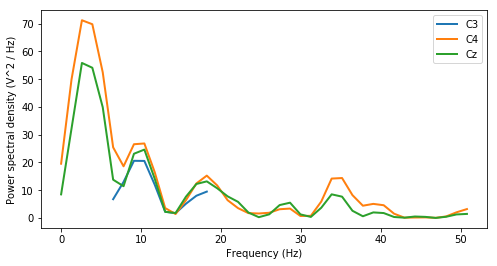

In [169]:
 a=psde(task2[label1[0]][20],task2[label1[1]][20],task2[label1[2]][20])

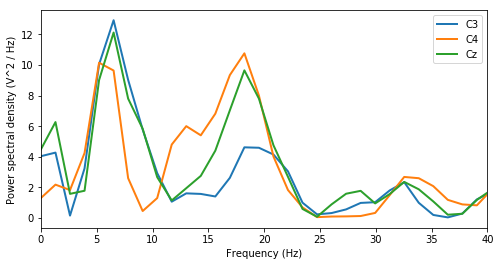

In [111]:
a=psde(task3[label2[0]][20],task3[label2[1]][20],task3[label2[2]][20])

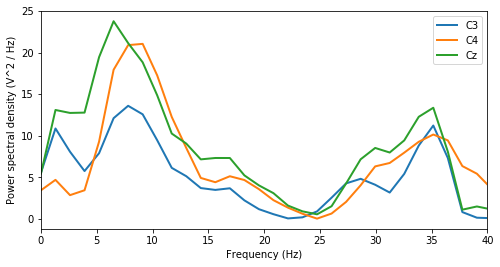

In [108]:
a=psde(task4[label3[0]][10a=psde(task2[label1[0]][20],task2[label1[1]][20],task2[label1[2]][20])],task4[label3[1]][10],task4[label3[2]][10])

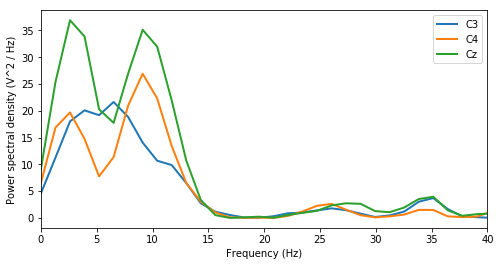

In [109]:
a=psde(task1[label[0]][20],task1[label[1]][20],task1[label[2]][20])

In [60]:
import pywt
mode = pywt.Modes.smooth
wav = pywt.Wavelet('db4')
wp1 = pywt.WaveletPacket(task3[label2[0]][1], wav, mode)
ys=wp1['aa'].data
print(ys)

[-1.77079498e+02 -1.28466563e+02 -7.96611611e+01 -3.16554172e+01
  1.89260070e+01  3.28699721e+01  2.42779751e+01  1.16685902e+01
 -9.15696549e+00  1.12012148e+01  3.07848127e+00  1.39819808e+01
 -9.83468484e+00 -3.42145976e+01 -2.75774330e+01  1.13816410e+01
  2.63527870e+01  4.01748919e+01  5.21089242e+01  2.58677161e+01
  3.03558918e+00 -5.10291369e+00 -1.08185491e+01 -9.50580091e+00
 -1.54301643e+01  6.00749275e+00  2.54992902e+01  2.49453587e+01
  8.35532172e+00 -2.31874958e+01 -2.28146467e+01  2.34428416e+00
  1.35549310e+01  2.52531852e+01  6.05613081e+00  6.47309979e+00
 -7.61669239e-01 -1.67747983e+01 -2.34632882e+01 -2.78397973e+01
 -2.25699287e+01 -2.52038561e+01 -3.29078523e+01 -4.26580642e+00
 -1.44526166e+01 -1.56990269e+01 -2.54152068e+01 -2.09077596e+01
 -1.10456455e+01 -1.46121157e+01  7.87051861e+00  6.88740072e+00
  4.39452246e+00  1.20427166e+01  7.70855736e+00  1.68886493e+01
 -1.32663435e+01 -1.47808823e+01  1.47213151e+01  1.58507427e+01
  1.01840754e+00  7.43603

In [8]:
import numpy as np
np.load('my_array.npy')
np.load('my_array1.npy')

array([0.3, 0.3, 0.1, 0.4, 0.2, 0.4, 0.5, 0.6, 0.4, 0.6, 0.4, 0.5, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.2, 0.4, 0.3, 0.3, 0.7, 0.1, 0.4, 0.4, 0.4,
       0.4, 0.2, 0.1, 0.5, 0.1, 0.6, 0.3, 0.3, 0.4, 0.2, 0.3, 0.3, 0.3,
       0.2, 0.3, 0.3, 0.2, 0.1, 0.1, 0.2], dtype=float32)

In [6]:
from sklearn.decomposition import FastICA, PCA
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
S=[task1[label[0]][20],task1[label[1]][20],task1[label[2]][20]]
S=np.array(S)
X = np.dot(S.T, A.T)
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print(S_.T[0])
psde2(S_.T[0],S_.T[1],S_.T[2])
print(A_.shape)


NameError: name 'task1' is not defined

In [ ]:
from sklearn.decomposition import FastICA, PCA
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
S=[task2[label1[0]][33],task2[label1[1]][33],task2[label1[2]][33]]
S=np.array(S)
X = np.dot(S.T, A.T)
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print(S_.T[0])
psde2(S_.T[0],S_.T[1],S_.T[2])
print(A_.shape)